In [19]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
#from wordcloud import WordCloud, ImageColorGenerator
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

tnews = fetch_20newsgroups(subset="train", remove=('headers', 'footers', 'quotes'))

In [21]:
print("DESCR: ", tnews.DESCR)

DESCR:  .. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimens

In [32]:
pprint(tnews.keys())
pprint(tnews.target_names)
pprint(tnews.target)
pprint(tnews.target.shape)
pprint(tnews.filenames.shape)
pprint(tnews.data[1])

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
array([7, 4, 4, ..., 3, 1, 8])
(11314,)
(11314,)
('A fair number of brave souls who upgraded their SI clock oscillator have\n'
 'shared their experiences for this poll. Please send a brief message '
 'detailing\n'
 'your experiences with the procedure. Top speed attained, CPU rated speed,\n'
 'add on cards and adapters, heat sinks, hour of usage per day, floppy disk\n'
 'functionality with 800 and 1.4 m floppies are especially requested.\n'
 '\n'
 'I will be summarizing in the next two days, so please add to the n

$\textit{TFIDF/CV - Matriz DT}$

In [37]:
tfidf1 = TfidfVectorizer(ngram_range=(1,1), stop_words="english")
tfidf2 = TfidfVectorizer(ngram_range=(1,2), stop_words="english")
cv1 = CountVectorizer(ngram_range=(1,1), stop_words="english")
cv2 = CountVectorizer(ngram_range=(1,2), stop_words="english")

vectorization1 = tfidf1.fit_transform(tnews.data)
vocabulary1 = tfidf1.get_feature_names_out()
vectorization2 = tfidf2.fit_transform(tnews.data)
vocabulary2 = tfidf2.get_feature_names_out()

vectorization3 = cv1.fit_transform(tnews.data)
vocabulary3 = cv1.get_feature_names_out()
vectorization4 = cv2.fit_transform(tnews.data)
vocabulary4 = cv2.get_feature_names_out()

<11314x101322 sparse matrix of type '<class 'numpy.float64'>'
	with 755809 stored elements in Compressed Sparse Row format>
<1x101322 sparse matrix of type '<class 'numpy.int64'>'
	with 34 stored elements in Compressed Sparse Row format>
array(['00', '000', '0000', ..., 'zzzzzzt', '³ation', 'ýé'], dtype=object)
array(['00', '000', '0000', ..., 'zzzzzzt', '³ation', 'ýé'], dtype=object)


Las vectorizaciones devuelven para cada fila (un documento) la repeticion de cada termino del vocabulario

In [125]:
pprint(vectorization1)
pprint(vocabulary1[17000:17010])
print(vectorization3[:2]) #Agarro los primeros 2 documentos y sus repeticiones de terminos
print(vocabulary1[25717])

<11314x101322 sparse matrix of type '<class 'numpy.float64'>'
	with 755809 stored elements in Compressed Sparse Row format>
array(['adv21', 'advacne', 'advanage', 'advance', 'advanced',
       'advancement', 'advancements', 'advances', 'advancing',
       'advantage'], dtype=object)
  (0, 9843)	1
  (0, 11174)	1
  (0, 16806)	1
  (0, 23430)	1
  (0, 24108)	1
  (0, 24583)	1
  (0, 25437)	1
  (0, 25717)	4
  (0, 31927)	1
  (0, 34741)	1
  (0, 34742)	1
  (0, 35902)	1
  (0, 37208)	1
  (0, 37256)	1
  (0, 41874)	1
  (0, 46690)	1
  (0, 49800)	1
  (0, 54493)	1
  (0, 55606)	1
  (0, 57247)	1
  (0, 57250)	1
  (0, 59071)	1
  (0, 62594)	1
  (0, 73174)	1
  (0, 76269)	1
  :	:
  (1, 40727)	1
  (1, 41836)	1
  (1, 45775)	1
  (1, 45997)	1
  (1, 47310)	1
  (1, 54504)	1
  (1, 60923)	1
  (1, 65377)	1
  (1, 66680)	1
  (1, 68519)	1
  (1, 72039)	2
  (1, 73122)	1
  (1, 75904)	1
  (1, 77460)	1
  (1, 81378)	1
  (1, 81848)	1
  (1, 82337)	1
  (1, 82666)	1
  (1, 83779)	1
  (1, 84088)	2
  (1, 86076)	1
  (1, 88277)	1
  (1, 

Similitud coseno entre los primeros 10 documentos del corpus representados como vectores CV o TFIDF

<Axes: >

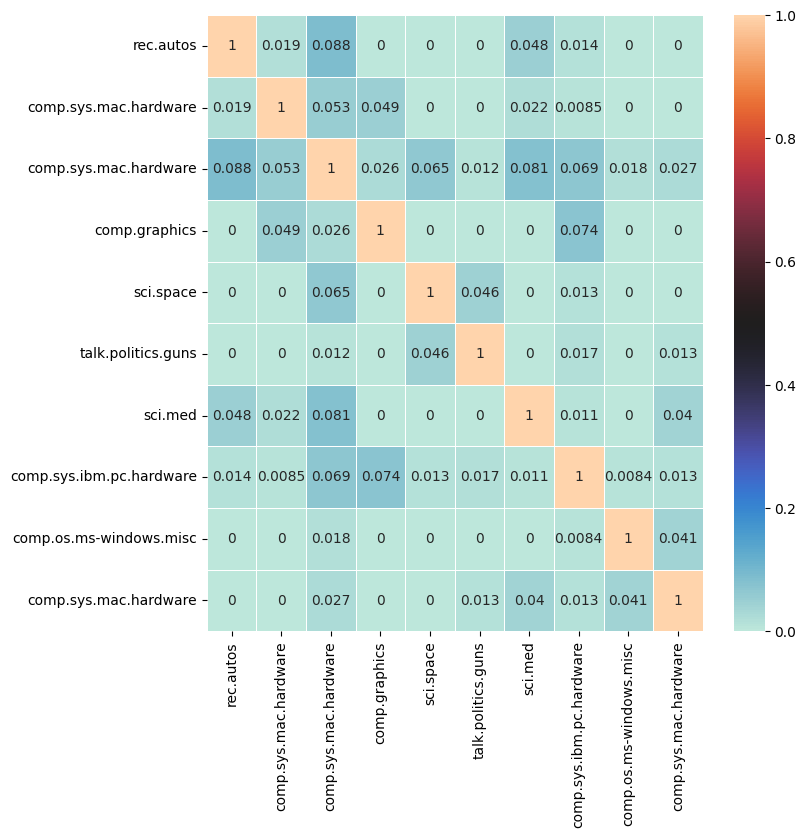

In [143]:
matTest = cosine_similarity(vectorization3[:10])

names = [tnews.target_names[i] for i in tnews.target[:10]]

fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(matTest, annot=True, linewidth=.5, 
            xticklabels=names,
            yticklabels=names,
            ax=ax,
            cmap="icefire")

Lo mismo que antes pero vemos las diferencias entre CV y TFIDF

<Axes: >

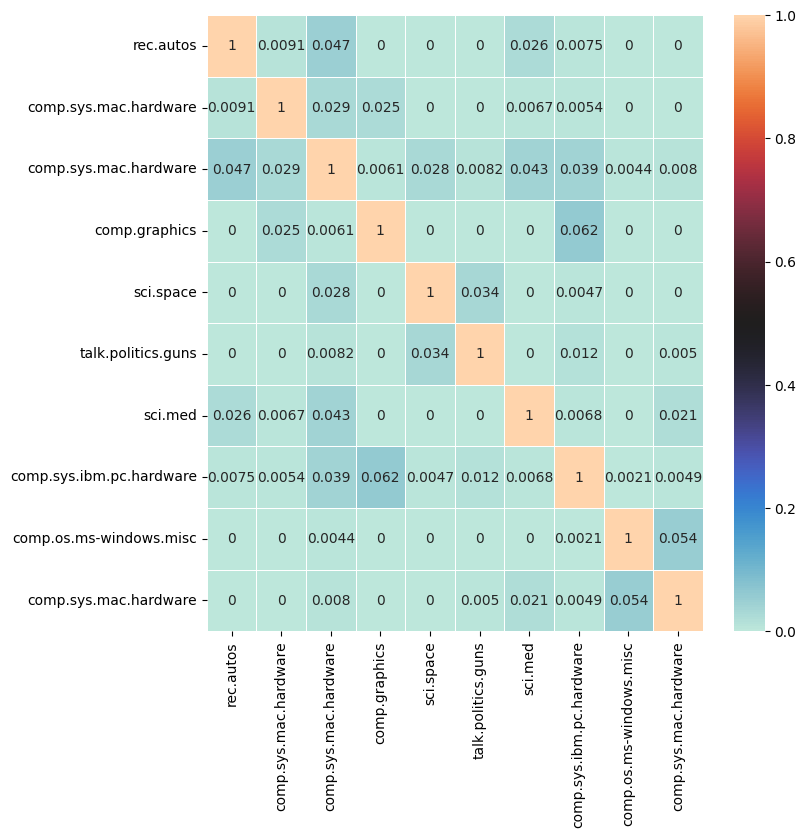

In [145]:
matTest = cosine_similarity(vectorization1[:10])

names = [tnews.target_names[i] for i in tnews.target[:10]]

fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(matTest, annot=True, linewidth=.5, 
            xticklabels=names,
            yticklabels=names,
            ax=ax,
            cmap="icefire")

ACA hay un tema con ref

In [176]:
def getSimilarity(vectors, ref):
    
    # Hacemos un diccionario para agrupar los articulos por categoria
    articles_by_category = {}
    matriz_similaridad = cosine_similarity(vectors)

    for i, category in enumerate(tnews.target_names):
        category_articles = np.array([[tnews.data[j], j] for j in range(len(tnews.data)) if tnews.target[j] == i])
        articles_by_category[category] = category_articles

    reference_article = int(random.choice(articles_by_category[ref][..., 1]))

    same = [matriz_similaridad[reference_article, int(j)] for j in articles_by_category[ref][..., 1] if int(j) != reference_article]
    diff = [matriz_similaridad[reference_article, j] for j in range(matriz_similaridad.shape[0]) if j not in articles_by_category[ref][..., 1]]
    
    return same, diff

same1, diff1 = getSimilarity(vectorization1, 'sci.space')
same2, diff2 = getSimilarity(vectorization2, 'sci.space')
same3, diff3 = getSimilarity(vectorization3, 'sci.space')
same4, diff4 = getSimilarity(vectorization4, 'sci.space')

Como es de esperar, los articulos de otras categorias tienen menos similitud coseno que los articulos del mismo tipo.

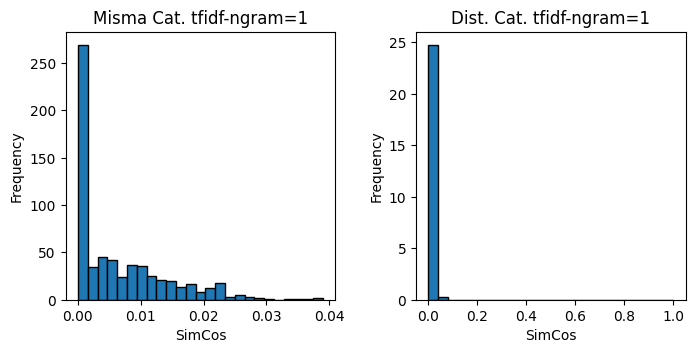

In [177]:
plt.figure(figsize=(8,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

plt.subplot(2, 2, 1)
plt.hist(same1, edgecolor='black', bins=25, density=True, log=False)
plt.xlabel('SimCos')
plt.ylabel('Frequency')
plt.title('Misma Cat. tfidf-ngram=1')

plt.subplot(2, 2, 2)
plt.hist(diff1, edgecolor='black', bins=25, density=True, log=False)
plt.xlabel('SimCos')
plt.ylabel('Frequency')
plt.title('Dist. Cat. tfidf-ngram=1')

plt.show()

Como la vectorizacion TFIDF penaliza las palabras que aparecen muchas veces en el corpus, se interpreta que los resultados son los esperados, ya que la similitud coseno entre los documentos de la misma categoria usando este metodo son menor en comparacion a la vectorizacion CV.

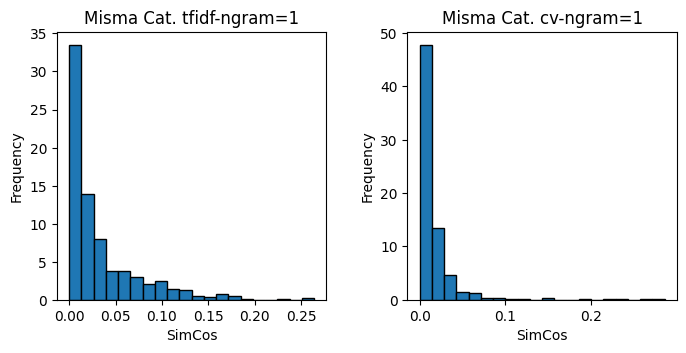

In [169]:
plt.figure(figsize=(8,8))

plt.subplot(2, 2, 1)
plt.hist(same1, edgecolor='black', bins=20, density=True, log=False)
plt.xlabel('SimCos')
plt.ylabel('Frequency')
plt.title('Misma Cat. tfidf-ngram=1')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

plt.subplot(2, 2, 2)
plt.hist(same3, edgecolor='black', bins=20, density=True, log=False)
plt.xlabel('SimCos')
plt.ylabel('Frequency')
plt.title('Misma Cat. cv-ngram=1')

plt.show()

Se observo que al agrandar los n_gramas de 1 a 1 y 2, la similitud entre textos de del mismo tipo es mayor.

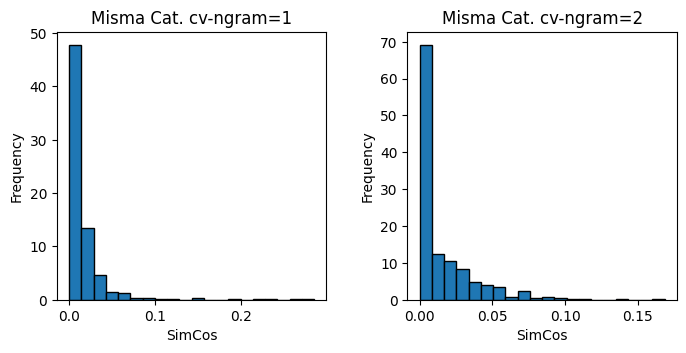

In [170]:
plt.figure(figsize=(8,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

plt.subplot(2, 2, 1)
plt.hist(same3, edgecolor='black', bins=20, density=True, log=False)
plt.xlabel('SimCos')
plt.ylabel('Frequency')
plt.title('Misma Cat. cv-ngram=1')

plt.subplot(2, 2, 2)
plt.hist(same4, edgecolor='black', bins=20, density=True, log=False)
plt.xlabel('SimCos')
plt.ylabel('Frequency')
plt.title('Misma Cat. cv-ngram=2')

plt.show()

Contrariamente, se observo que al agrandar los n_gramas de 1 a 1 y 2, la similitud entre textos de distinto tipo es menor.

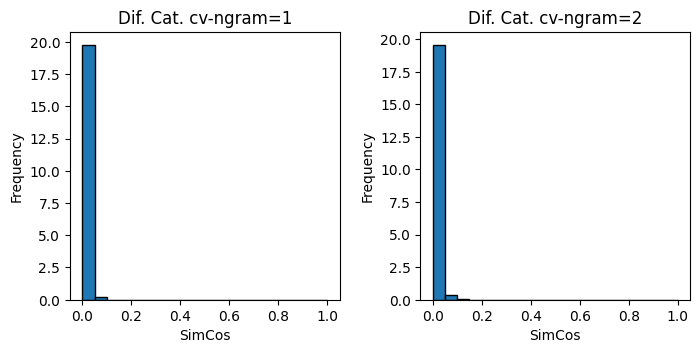

In [173]:
plt.figure(figsize=(8,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

plt.subplot(2, 2, 1)
plt.hist(diff3, edgecolor='black', bins=20, density=True, log=False)
plt.xlabel('SimCos')
plt.ylabel('Frequency')
plt.title('Dif. Cat. cv-ngram=1')

plt.subplot(2, 2, 2)
plt.hist(diff4, edgecolor='black', bins=20, density=True, log=False)
plt.xlabel('SimCos')
plt.ylabel('Frequency')
plt.title('Dif. Cat. cv-ngram=2')

plt.show()

$\textit{Ahora con TSVD}$

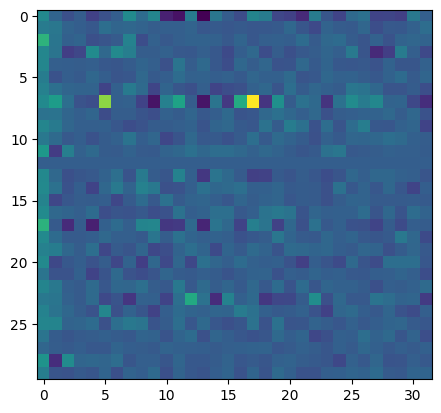

In [18]:
svd = TruncatedSVD(n_components=32)
svd.fit(vectorization1)
transformed = svd.transform(vectorization1)
transformed.shape
plt.imshow(transformed[:30][:])

$\textit{TFIDF/CV - Matriz TD}$

$\textit{Matriz TC}$

In [11]:
vectorization1 ## Documento Termino


<11314x101322 sparse matrix of type '<class 'numpy.float64'>'
	with 755809 stored elements in Compressed Sparse Row format>